In [1]:
%load_ext autotime
import geopandas as gpd
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()
pd.set_option('display.max_columns', None)

In [2]:
# From https://zenodo.org/records/7786276/files/global_shoreline_5deg_1081.geojson?download=1
df = gpd.read_file("global_shoreline_5deg_1081.geojson")
df = df.cx[7.739868:10.167847, 38.745515:41.331451]
df

/home/ubuntu/.local/lib/python3.10/site-packages/pyogrio/raw.py:196: RuntimeWarning: Several features with id = 1082 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


,OBJECTID,MasterKey,RandomSort,MEAN_SIG_WAVEHEIGHT,TIDAL_RANGE,CHLOROPHYLL,TURBIDITY,TEMP_MOISTURE,EMU_PHYSICAL,REGIONAL_SINUOSITY,GHM,MAX_SLOPE,OUTFLOW_DENSITY,ERODIBILITY,Cluster,LENGTH_GEO,chl_label,river_label,sinuosity_label,slope_label,tidal_label,turbid_label,wave_label,CSU_Descriptor,CSU_ID,OUTFLOW_DENSITY_RESCALED,Shape_Length,id,left,top,right,bottom,geometry
0,907574,907574,1.339858e+06,1.203664,0.295182,0.220536,0.258000,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,0.000000,0.214731,112.695580,9808.007812,Medium,6,778.300676,low chlorophyll,low river discharge,straight,steeply sloping,microtidal,moderately turbid,moderate wave energy,"steeply sloping, straight, medium erodibility,...",62179,0.000012,0.008141,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((8.40867 38.86355, 8.40874 38..."
1,907575,907575,3.967442e+06,1.203664,0.295182,0.220536,0.258000,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,0.000000,0.209415,300.382854,9808.007812,Medium,6,463.994155,low chlorophyll,low river discharge,straight,vertical,microtidal,moderately turbid,moderate wave energy,"vertical, straight, medium erodibility, warm t...",62622,0.000012,0.004439,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((8.40771 38.85997, 8.40761 38..."
2,907586,907586,1.235383e+06,0.622337,0.348026,0.339501,0.057633,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,1.278436,0.123384,166.613138,12734.571289,Low,3,763.562749,low chlorophyll,moderate river discharge,straight,steeply sloping,minimally tidal,clear,low wave energy,"steeply sloping, straight, low erodibility, wa...",40612,0.000015,0.007537,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((9.66895 40.13155, 9.66901 40..."
3,907587,907587,6.660882e+05,1.140702,0.294072,0.582373,0.339033,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,1.793546,0.539095,14.684499,31990.990234,High,6,774.841655,low chlorophyll,moderate river discharge,sinuous,sloping,microtidal,turbid,moderate wave energy,"sloping, sinuous, high erodibility, warm tempe...",11645,0.000039,0.007653,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((8.47232 39.10853, 8.47244 39..."
4,907588,907588,1.493575e+04,1.140702,0.294072,0.582373,0.339033,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,1.793546,0.340919,1.932023,31990.990234,High,6,774.900004,low chlorophyll,moderate river discharge,sinuous,flat,microtidal,turbid,moderate wave energy,"flat, sinuous, high erodibility, warm temperat...",11239,0.000039,0.007661,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((8.47553 39.10298, 8.47539 39..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,915205,915205,2.706507e+06,0.722644,0.344119,0.359111,0.055317,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,7.356478,0.246845,44.026800,63795.773438,Low,3,750.388802,low chlorophyll,moderate river discharge,highly sinuous,sloping,minimally tidal,clear,low wave energy,"sloping, highly sinuous, low erodibility, warm...",35463,0.000077,0.007509,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((9.34704 41.30481, 9.34715 41..."
2535,915206,915206,1.432397e+06,0.722644,0.355242,0.359111,0.055700,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,0.000000,0.225329,7.584660,22605.697266,Low,3,750.849672,low chlorophyll,moderate river discharge,straight,flat,minimally tidal,clear,low wave energy,"flat, straight, low erodibility, warm temperat...",39068,0.000027,0.007784,1082,5.00017,43.666254,10.00017,38.666254,"MULTILINESTRING ((9.40441 41.29624, 9.40447 41..."
2536,915207,915207,2.286499e+06,0.722644,0.355242,0.359111,0.055700,Warm Temperate Dry,Euhaline-Oxic-Moderate to Cool,0.000000,0.225329,4.423934,22605.697266,Low,3,80.127563,low chlorophyll,moderate river discharge,straight,flat,minimally tidal,clear,low wave energy,"flat, straight, low erodibility, warm temperat...",39068,0.000027,0.000848,1082,5.00017,43.666254,10.00017,

In [3]:
df.wave_label.value_counts()

wave_label
low wave energy         1532
moderate wave energy    1007
Name: count, dtype: int64

<Axes: >

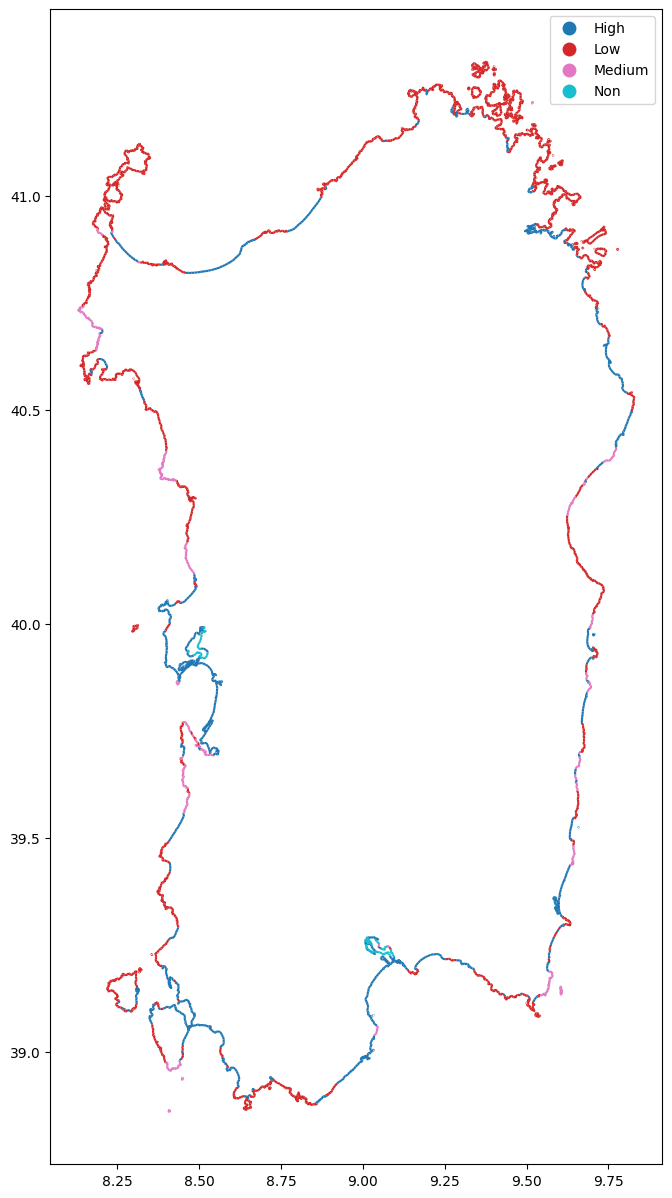

In [4]:
df.plot("ERODIBILITY", legend=True, figsize=(15, 15))

In [5]:
df.geometry.type.value_counts()

MultiLineString    2539
Name: count, dtype: int64

In [6]:
df.LENGTH_GEO.describe()

count    2539.000000
mean      739.979760
std       104.121353
min         5.577506
25%       753.833453
50%       759.606810
75%       772.064432
max       779.064634
Name: LENGTH_GEO, dtype: float64

In [7]:
df.to_crs(3003).length.describe()

count    2539.000000
mean      739.718333
std       104.084327
min         5.575456
25%       753.573519
50%       759.341502
75%       771.795815
max       778.774550
dtype: float64

In [8]:
df = df.explode()
df["id"] = "sar" + (df.index + 1).astype(str).str.zfill(4)
df["beach_length"] = df.LENGTH_GEO

In [9]:
#shorelines = gpd.read_file("shorelines.geojson")
#pd.concat((shorelines, df[["id", "beach_length", "geometry"]])).to_file("shorelines.geojson", driver="GeoJSON")

In [10]:
#df.geometry = df.geometry.to_crs(3003).buffer(100).minimum_rotated_rectangle().to_crs(4326)
#poly = gpd.read_file("polygons.geojson")
#poly = pd.concat((poly, df[["id", "geometry"]]))
#poly.to_file("polygons.geojson")

In [11]:
transects = gpd.read_file("transects_extended.geojson")
transects

,id,site_id,orientation,along_dist,along_dist_norm,beach_slope,cil,ciu,trend,n_points,n_points_nonan,r2_score,mae,mse,rmse,intercept,geometry
0,aus0001-0000,aus0001,104.347648,0.000000,0.000000,0.085,0.0545,0.2000,-1.456305,654.0,342.0,0.131951,28.721214,1321.059410,36.346381,179.407277,"LINESTRING (153.26555 -24.7007, 153.26938 -24...."
1,aus0001-0001,aus0001,93.495734,98.408334,0.002935,0.050,0.0387,0.0640,-0.833581,654.0,473.0,0.052783,26.029482,1092.336862,33.050520,210.629160,"LINESTRING (153.26525 -24.7019, 153.2692 -24.7..."
2,aus0001-0002,aus0001,82.069341,198.408334,0.005918,0.050,0.0428,0.0647,-0.282209,654.0,491.0,0.008220,22.896464,838.997233,28.965449,200.166307,"LINESTRING (153.26539 -24.70316, 153.26931 -24..."
3,aus0001-0003,aus0001,81.192757,298.402523,0.008900,0.055,0.0480,0.0659,0.089340,654.0,502.0,0.000987,20.770475,691.179232,26.290288,185.295473,"LINESTRING (153.26555 -24.70408, 153.26945 -24..."
4,aus0001-0004,aus0001,81.065473,398.402523,0.011882,0.075,0.0614,0.0922,0.361437,654.0,508.0,0.017461,19.528839,637.676213,25.252252,169.027861,"LINESTRING (153.2657 -24.70497, 153.26961 -24...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127424,nzd0562-0017,nzd0562,NaN,NaN,NaN,0.055,0.0541,0.0608,0.015373,592.0,414.0,0.000098,8.272947,131.364695,11.461444,212.237725,"LINESTRING (174.9093 -36.86951, 174.91331 -36...."
127425,nzd0562-0018,nzd0562,NaN,NaN,NaN,0.045,0.0434,0.0461,0.265774,592.0,378.0,0.020234,9.827039,188.039415,13.712746,216.724673,"LINESTRING (174.90891 -36.86889, 174.91293 -36..."
127426,nzd0563-0000,nzd0563,NaN,NaN,NaN,0.200,0.1756,0.2000,-0.255650,779.0,693.0,0.017023,12.987666,213.803544,14.622023,182.622138,"LINESTRING (176.9374 -39.3345, 176.938 -39.33807)"
127427,nzd0563-0001,nzd0563,NaN,NaN,NaN,0.050,0.0323,0.1200,-0.076326,779.0,622.0,0.003563,8.479386,95.170234,9.755523,437.115698,"LINESTRING (176.93648 -39.33459, 176.93708 -39..."


In [46]:
import numpy as np
from shapely.geometry import LineString, Point
from shapelysmooth import taubin_smooth

def create_transects(row, spacing=100, transect_length=400):
    transects = []
    line = row.geometry
    distances = np.arange(0, line.length, spacing)

    for distance in distances:
        # Find point along the average line
        point = line.interpolate(distance)
        
        # Find the direction of the line at this point (tangent direction)
        nearest_point_ahead = line.interpolate(min(distance + 1e-6, line.length))
        direction = np.arctan2(nearest_point_ahead.y - point.y, nearest_point_ahead.x - point.x)
        
        # Rotate 90 degrees (perpendicular) and extend to create a transect
        transect = LineString([
            Point(
                point.x - transect_length / 2 * np.cos(direction + np.pi / 2),
                point.y - transect_length / 2 * np.sin(direction + np.pi / 2)
            ),
            Point(
                point.x + transect_length / 2 * np.cos(direction + np.pi / 2),
                point.y + transect_length / 2 * np.sin(direction + np.pi / 2)
            )
        ])
        
        transects.append(transect)
    
    transects = gpd.GeoDataFrame(geometry=transects, crs=3003).to_crs(4326)
    site_id = row.id
    transects["id"] = site_id + "-" + transects.index.astype(str).str.pad(4, fillchar="0")
    transects["site_id"] = site_id
    
    return transects

#new_shoreline = df.sample(1)
#smoothed_line = taubin_smooth(new_shoreline.to_crs(3003).geometry.iloc[0], steps=1000)
df = df.to_crs(3003)
new_transects = df.progress_apply(create_transects, axis=1)
new_transects
#new_transects = create_transects(new_shoreline.to_crs(3003).geometry.iloc[0])
#m = new_transects.explore()
#new_shoreline.explore(m=m)
#gpd.GeoSeries([smoothed_line], crs=3003).explore(m=m, color="red")
#new_poly.boundary.explore(m=m)
#gpd.GeoSeries(new_transects.geometry.apply(lambda line: Point(line.coords[0])), crs=new_transects.crs).explore(m=m, color="red", name="transect start")
#print("Make sure the origin is inland")
#m

  0%|          | 0/2539 [00:00<?, ?it/s]

0                                                 geom...
1                                                 geom...
2                                                 geom...
3                                                 geom...
4                                                 geom...
                              ...                        
2534                                              geom...
2535                                              geom...
2536                                              geom...
2537                                              geom...
2538                                             geome...
Length: 2539, dtype: object

In [52]:
new_transects = pd.concat(new_transects.tolist())
new_transects

,geometry,id,site_id
0,"LINESTRING (8.40852 38.86175, 8.40882 38.86535)",sar0001-0000,sar0001
1,"LINESTRING (8.4084 38.86162, 8.41092 38.86464)",sar0001-0001,sar0001
2,"LINESTRING (8.40893 38.86153, 8.41236 38.86393)",sar0001-0002,sar0001
3,"LINESTRING (8.40904 38.86129, 8.41333 38.8626)",sar0001-0003,sar0001
4,"LINESTRING (8.40904 38.86176, 8.4133 38.86037)",sar0001-0004,sar0001
...,...,...,...
4,"LINESTRING (9.33568 41.29334, 9.33294 41.29629)",sar2538-0004,sar2538
0,"LINESTRING (9.40022 41.3002, 9.40172 41.30362)",sar2539-0000,sar2539
1,"LINESTRING (9.39917 41.3019, 9.4035 41.30039)",sar2539-0001,sar2539
2,"LINESTRING (9.40237 41.3022, 9.39864 41.29996)",sar2539-0002,sar2539


In [ ]:
#pd.concat((transects, new_transects)).to_file("transects_extended.geojson", driver="GeoJSON")

In [54]:
%reload_ext autotime

import os
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
from scipy import interpolate
from scipy import stats
from datetime import datetime, timedelta
import pytz
from coastsat import SDS_download, SDS_preprocess, SDS_shoreline, SDS_tools, SDS_transects
import geopandas as gpd
import tqdm.auto as tqdm
from glob import glob
import ee
from shapely.ops import split
from shapely import line_merge
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

In [55]:
service_account = 'service-account@iron-dynamics-294100.iam.gserviceaccount.com'
credentials = ee.ServiceAccountCredentials(service_account, '.private-key.json')
ee.Initialize(credentials)

In [56]:
poly = gpd.read_file("polygons.geojson")
poly = poly[poly.id.str.startswith("sar")]
poly.set_index("id", inplace=True)
poly

,area,id_sorted,northing,geometry
id,,,,
sar0001,NaN,None,NaN,"POLYGON ((8.41164 38.85827, 8.41311 38.86375, ..."
sar0002,NaN,None,NaN,"POLYGON ((8.40699 38.86475, 8.40555 38.85941, ..."
sar0003,NaN,None,NaN,"POLYGON ((9.67495 40.12608, 9.67048 40.13312, ..."
sar0004,NaN,None,NaN,"POLYGON ((8.47579 39.10868, 8.47212 39.11557, ..."
sar0005,NaN,None,NaN,"POLYGON ((8.4693 39.10845, 8.4735 39.10127, 8...."
...,...,...,...,...
sar2535,NaN,None,NaN,"POLYGON ((9.35364 41.30264, 9.34864 41.30703, ..."
sar2536,NaN,None,NaN,"POLYGON ((9.4077 41.29717, 9.40236 41.29712, 9..."
sar2537,NaN,None,NaN,"POLYGON ((9.4044 41.29757, 9.40198 41.29588, 9..."


In [58]:
sitename = "sar1745"

In [61]:
inputs = {
    "polygon": list(poly.geometry[sitename].exterior.coords),
    "dates": ['1900-01-01', '2030-12-30'], # All available imagery
    "sat_list": ['L9'],
    "sitename": sitename,
    "filepath": 'data',
    "landsat_collection": 'C02',
}
result = SDS_download.check_images_available(inputs)

Number of images available between 1900-01-01 and 2030-12-30:
- In Landsat Tier 1 & Sentinel-2 Level-1C:
     L9: 211 images
  Total images available to download from Tier 1: 211 images
  Total images available to download from Tier 2: 0 images


In [62]:
metadata = SDS_download.retrieve_images(inputs)
#metadata = SDS_download.get_metadata(inputs)

Number of images available between 1900-01-01 and 2030-12-30:
- In Landsat Tier 1 & Sentinel-2 Level-1C:
     L9: 211 images
L9:There are 211 images available, 0 images already exist, 211 to download
  Total images available to download from Tier 1: 211 images
  Total images available to download from Tier 2: 0 images


sar1745: Downloading Imagery for 1 satellites:   0%|          | 0/1 [00:00<?, ?it/s]

sar1745: Downloading Imagery for L9:   0%|          | 0/211 [00:00<?, ?it/s]

skipping image '2021-12-23-09-59-51_L9_sar1745_ms.tif' due to cloud and no data cover 100.00% exceeds threshold of 95.00%
skipping image '2022-04-14-09-59-25_L9_sar1745_ms.tif' due to cloud and no data cover 100.00% exceeds threshold of 95.00%
skipping image '2023-01-27-09-59-58_L9_sar1745_ms.tif' due to cloud and no data cover 100.00% exceeds threshold of 95.00%
skipping image '2023-04-01-09-59-31_L9_sar1745_ms.tif' due to cloud and no data cover 100.00% exceeds threshold of 95.00%
skipping image '2023-05-03-09-59-13_L9_sar1745_ms.tif' due to cloud and no data cover 100.00% exceeds threshold of 95.00%
skipping image '2023-07-22-09-59-09_L9_sar1745_ms.tif' due to cloud and no data cover 100.00% exceeds threshold of 95.00%
skipping image '2023-10-26-09-59-46_L9_sar1745_ms.tif' due to cloud and no data cover 100.00% exceeds threshold of 95.00%
skipping image '2023-12-29-09-59-52_L9_sar1745_ms.tif' due to cloud and no data cover 96.59% exceeds threshold of 95.00%
skipping image '2024-01-1

In [63]:
shorelines = gpd.read_file("shorelines.geojson")
#shorelines = shorelines[shorelines.id.str.startswith("nzd")]
shorelines.set_index("id", inplace=True)
shorelines

,area,beach_length,easting,name,northing,Tide range,median_orientation,id_sorted,same_beach,median_slope,ci,n_points,n_points_nonan,geometry
id,,,,,,,,,,,,,,
aus0001,14472901.48412414,16824.52342226356,526589.1754011525,noname,7259734.061377056,1.451,92.466545,aus0001,None,0.076702,0.0214,654.0,520.0,"LINESTRING (153.26746 -24.70115, 153.26743 -24..."
aus0002,53438721.70867591,16794.63203331262,529484.7418874454,noname,7243833.021796449,1.073,64.603602,aus0002,1,0.059681,0.0203,579.0,407.0,"LINESTRING (153.26189 -24.85277, 153.26191 -24..."
aus0003,945965.0455573548,1373.06418305453,535380.0262458471,noname,7237842.578773651,1.074,93.116374,aus0003,None,0.041382,0.0112,335.0,243.0,"LINESTRING (153.35089 -24.96818, 153.35075 -24..."
aus0004,376936.0048626679,253.8720097247056,535397.4773649719,noname,7236435.680204276,1.074,79.203813,aus0004,None,0.051540,0.0154,319.0,238.0,"LINESTRING (153.35051 -24.98595, 153.35099 -24..."
aus0005,1570125.540326883,1830.166677525537,535675.2172291321,noname,7235101.123683789,1.074,74.946714,aus0005,None,0.054151,0.0245,307.0,231.5,"LINESTRING (153.35161 -24.99115, 153.35228 -24..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sar2535,None,750.3888020123532,None,None,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,"LINESTRING (9.34704 41.30481, 9.34715 41.30459..."
sar2536,None,750.849671836081,None,None,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,"LINESTRING (9.40441 41.29624, 9.40447 41.29623..."
sar2537,None,80.12756343618439,None,None,None,NaN,NaN,None,None,NaN,NaN,NaN,NaN,"LINESTRING (9.40374 41.29577, 9.4039 41.29595,..."


In [64]:
# settings for the shoreline extraction
settings = {
    # general parameters:
    'cloud_thresh': 0.1,        # threshold on maximum cloud cover
    'dist_clouds': 300,         # ditance around clouds where shoreline can't be mapped
    'output_epsg': 3003,       # epsg code of spatial reference system desired for the output
    # quality control:
    'check_detection': False,    # if True, shows each shoreline detection to the user for validation
    'adjust_detection': False,  # if True, allows user to adjust the postion of each shoreline by changing the threhold
    'save_figure': False,        # if True, saves a figure showing the mapped shoreline for each image
    # [ONLY FOR ADVANCED USERS] shoreline detection parameters:
    'min_beach_area': 1000,     # minimum area (in metres^2) for an object to be labelled as a beach
    'min_length_sl': 500,       # minimum length (in metres) of shoreline perimeter to be valid
    'cloud_mask_issue': True,  # switch this parameter to True if sand pixels are masked (in black) on many images
    'sand_color': 'default',    # 'default', 'latest', 'dark' (for grey/black sand beaches) or 'bright' (for white sand beaches)
    'pan_off': False,           # True to switch pansharpening off for Landsat 7/8/9 imagery
    's2cloudless_prob': 40,      # threshold to identify cloud pixels in the s2cloudless probability mask
    # add the inputs defined previously
    'inputs': inputs
}

# [OPTIONAL] preprocess images (cloud masking, pansharpening/down-sampling)
#SDS_preprocess.save_jpg(metadata, settings, use_matplotlib=True)

In [65]:
transects_gdf = gpd.read_file("transects_extended.geojson")
transects_gdf.set_index("id", inplace=True)
transects_gdf = transects_gdf[transects_gdf.site_id == sitename]
display(transects_gdf)
transects = {}
for transect_id in transects_gdf.index:
    transects[transect_id] = np.array(transects_gdf.geometry.to_crs(settings["output_epsg"])[transect_id].coords)
transects

,site_id,orientation,along_dist,along_dist_norm,beach_slope,cil,ciu,trend,n_points,n_points_nonan,r2_score,mae,mse,rmse,intercept,geometry
id,,,,,,,,,,,,,,,,
sar1745-0000,sar1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (9.53078 41.07576, 9.53397 41.07308)"
sar1745-0001,sar1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (9.53104 41.07571, 9.53179 41.07215)"
sar1745-0002,sar1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (9.52861 41.07463, 9.53224 41.07229)"
sar1745-0003,sar1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (9.5276 41.0731, 9.53222 41.07223)"
sar1745-0004,sar1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (9.52732 41.07186, 9.53208 41.07171)"
sar1745-0005,sar1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (9.5272 41.07157, 9.53164 41.07026)"
sar1745-0006,sar1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (9.52678 41.07006, 9.53154 41.07005)"
sar1745-0007,sar1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (9.52678 41.06914, 9.53154 41.06917)"


{'sar1745-0000': array([[1544619.1198001 , 4547311.4894171 ],
        [1544888.91147491, 4547016.17187249]]),
 'sar1745-0001': array([[1544641.10297383, 4547306.1303015 ],
        [1544705.92598405, 4546911.41777661]]),
 'sar1745-0002': array([[1544437.63797605, 4547184.90759041],
        [1544743.82450715, 4546927.51720962]]),
 'sar1745-0003': array([[1544353.31040333, 4547014.77529118],
        [1544742.14328669, 4546920.91907795]]),
 'sar1745-0004': array([[1544331.0508549 , 4546876.703842  ],
        [1544730.80024998, 4546862.54682708]]),
 'sar1745-0005': array([[1544321.08123089, 4546844.86760508],
        [1544694.63980905, 4546701.85016339]]),
 'sar1745-0006': array([[1544286.28400402, 4546676.91615006],
        [1544686.28217254, 4546678.12657282]]),
 'sar1745-0007': array([[1544286.95709105, 4546574.45188405],
        [1544686.90989419, 4546580.59641035]])}

In [66]:
ref_sl = np.array(line_merge(split(shorelines.geometry.to_crs(settings["output_epsg"])[sitename], transects_gdf.to_crs(settings["output_epsg"]).unary_union)).coords)
ref_sl

array([[1544754.01570766, 4547163.83116671],
       [1544754.01540959, 4547163.83089427],
       [1544704.02082838, 4547118.13570574],
       [1544699.47990674, 4547115.15702912],
       [1544694.29273781, 4547113.02125344],
       [1544688.6580787 , 4547111.46970074],
       [1544682.7409863 , 4547110.28678381],
       [1544673.51439731, 4547108.77453609],
       [1544670.61632372, 4547108.29953875],
       [1544664.66763798, 4547107.15785335],
       [1544658.97419668, 4547105.68290031],
       [1544653.69156601, 4547103.67202139],
       [1544649.00376917, 4547100.88498545],
       [1544607.67399649, 4547074.25468197],
       [1544603.54164225, 4547071.1666489 ],
       [1544600.45347518, 4547067.77623757],
       [1544590.7310256 , 4547056.21258159],
       [1544579.62947613, 4547043.0086562 ],
       [1544576.9971503 , 4547039.0234226 ],
       [1544561.24733992, 4547015.05447067],
       [1544558.82458956, 4547010.7960839 ],
       [1544556.6326481 , 4547004.75205292],
       [15

In [67]:
settings["max_dist_ref"] = 300
settings["reference_shoreline"] = ref_sl #np.flip(ref_sl)

In [68]:
output = SDS_shoreline.extract_shorelines(metadata, settings)

L9: Mapping Shorelines:   0%|          | 0/165 [00:00<?, ?it/s]

In [ ]:
# Have to flip to get x,y?
output['shorelines'] = [np.flip(s) for s in output['shorelines']]

In [69]:
output = SDS_tools.remove_duplicates(output) # removes duplicates (images taken on the same date by the same satellite)
output = SDS_tools.remove_inaccurate_georef(output, 10) # remove inaccurate georeferencing (set threshold to 10 m)

37 duplicates
0 bad georef


In [70]:
from pyproj import CRS
geomtype = 'lines' # choose 'points' or 'lines' for the layer geometry
gdf = SDS_tools.output_to_gdf(output, geomtype)
if gdf is None:
    raise Exception("output does not contain any mapped shorelines")
gdf.crs = CRS(settings['output_epsg']) # set layer projection
# save GEOJSON layer to file
gdf.to_file(os.path.join(inputs['filepath'], inputs['sitename'], '%s_output_%s.geojson'%(sitename,geomtype)),
                                driver='GeoJSON', encoding='utf-8')

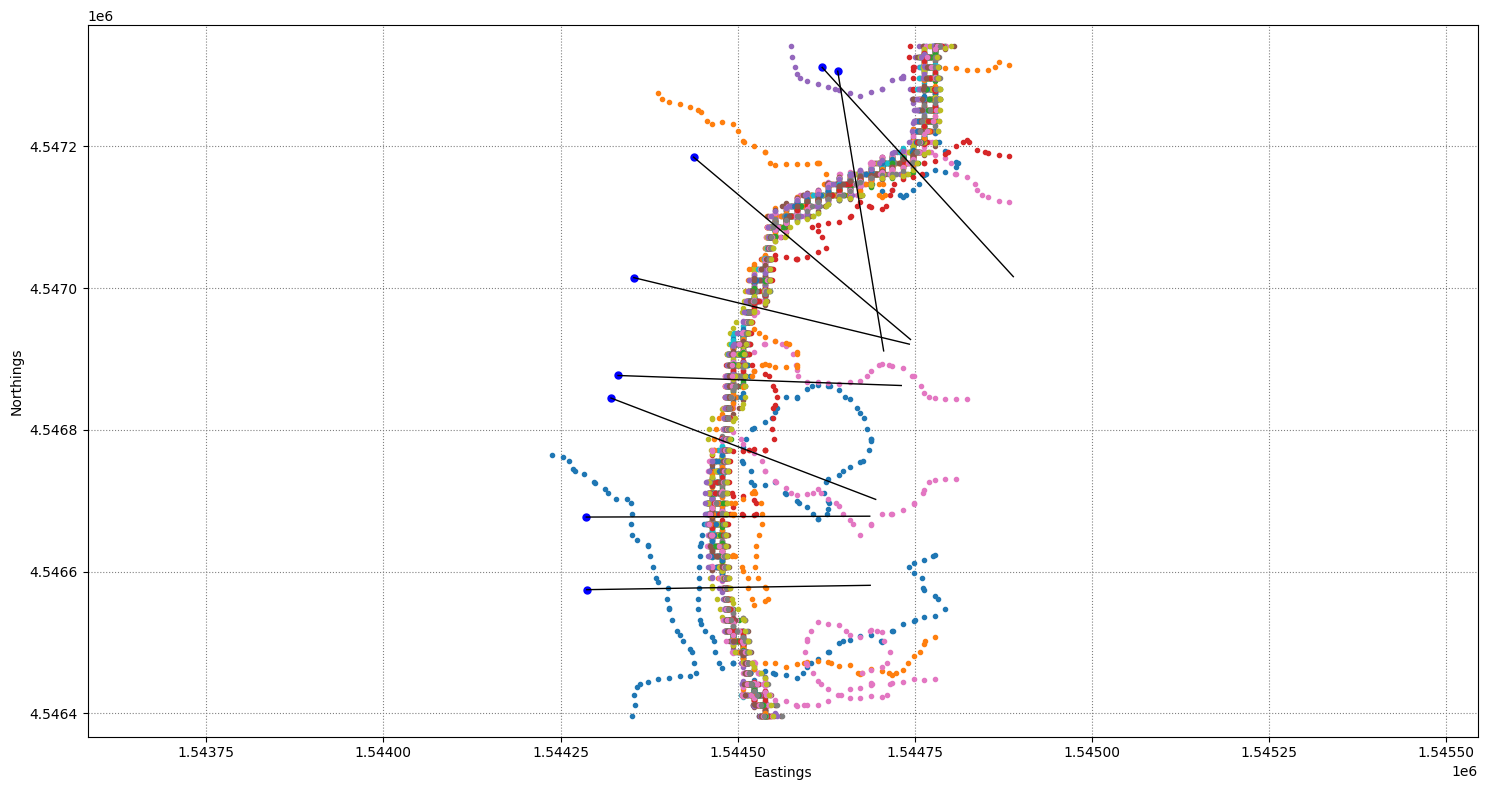

In [71]:
plt.ioff()
fig = plt.figure(figsize=[15,8], tight_layout=True)
plt.axis('equal')
plt.xlabel('Eastings')
plt.ylabel('Northings')
plt.grid(linestyle=':', color='0.5')
for i in range(len(output['shorelines'])):
    sl = output['shorelines'][i]
    date = output['dates'][i]
    plt.plot(sl[:,0], sl[:,1], '.', label=date.strftime('%d-%m-%Y'),lw=.1)
for i,key in enumerate(list(transects.keys())):
    plt.plot(transects[key][0,0],transects[key][0,1], 'bo', ms=5)
    plt.plot(transects[key][:,0],transects[key][:,1],'k-',lw=1)
    #plt.text(transects[key][0,0], transects[key][0,1], key.replace(f"{sitename}-0", ""),
    #            va='center', ha='center', bbox=dict(boxstyle="square", ec='k',fc='w'))
plt.show()

In [72]:
settings_transects = { # parameters for computing intersections
                      'along_dist':          25,        # along-shore distance to use for computing the intersection
                      'min_points':          3,         # minimum number of shoreline points to calculate an intersection
                      'max_std':             15,        # max std for points around transect
                      'max_range':           30,        # max range for points around transect
                      'min_chainage':        -100,      # largest negative value along transect (landwards of transect origin)
                      'multiple_inter':      'auto',    # mode for removing outliers ('auto', 'nan', 'max')
                      'auto_prc':            0.1,       # percentage of the time that multiple intersects are present to use the max
                     }
cross_distance = SDS_transects.compute_intersection_QC(output, transects, settings_transects) 

Computing transect shoreline intersections:   0%|          | 0/8 [00:00<?, ?it/s]

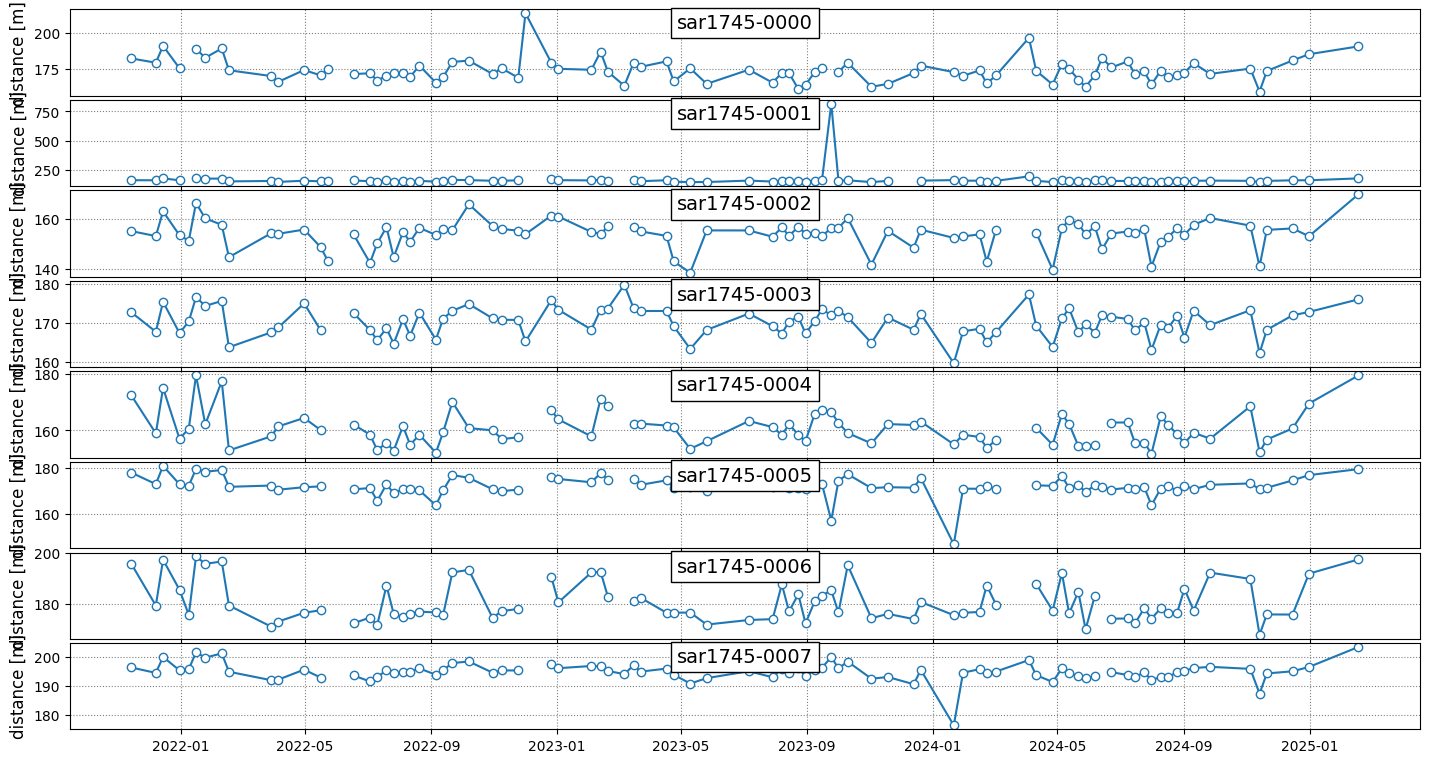

In [73]:
fig = plt.figure(figsize=[15,8], tight_layout=True)
gs = gridspec.GridSpec(len(cross_distance),1)
gs.update(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.05)
for i,key in enumerate(cross_distance.keys()):
    if np.all(np.isnan(cross_distance[key])):
        continue
    ax = fig.add_subplot(gs[i,0])
    ax.grid(linestyle=':', color='0.5')
    ax.plot(output['dates'], cross_distance[key], '-o', ms=6, mfc='w')
    ax.set_ylabel('distance [m]', fontsize=12)
    ax.text(0.5,0.95, key, bbox=dict(boxstyle="square", ec='k',fc='w'), ha='center',
            va='top', transform=ax.transAxes, fontsize=14)
plt.show()

In [74]:
# save a .csv file for Excel users
out_dict = dict([])
out_dict['dates'] = output['dates']
out_dict["satname"] = output["satname"]
for key in transects.keys():
    out_dict[key] = cross_distance[key]
df = pd.DataFrame(out_dict)
fn = os.path.join(settings['inputs']['filepath'],settings['inputs']['sitename'],
                  'transect_time_series.csv')
#df.to_csv(fn, sep=',')
#print('Time-series of the shoreline change along the transects saved as:\n%s'%fn)
df

,dates,satname,sar1745-0000,sar1745-0001,sar1745-0002,sar1745-0003,sar1745-0004,sar1745-0005,sar1745-0006,sar1745-0007
0,2021-11-13 10:04:24+00:00,L9,182.040572,162.134828,155.049773,172.772739,172.464147,177.985371,195.748877,196.335774
1,2021-12-07 09:59:56+00:00,L9,179.038857,161.719772,153.053300,167.688190,158.922973,172.969145,179.493134,194.447508
2,2021-12-14 10:06:02+00:00,L9,190.777754,177.763762,162.953742,175.429800,174.995544,180.847980,197.202959,199.994506
3,2021-12-30 10:06:01+00:00,L9,175.124070,161.792555,153.365074,167.339696,156.974809,172.894341,185.578364,195.323245
4,2022-01-08 09:59:49+00:00,L9,NaN,NaN,151.166990,170.374119,160.611265,172.323234,175.838473,195.732182
...,...,...,...,...,...,...,...,...,...,...
84,2024-11-13 09:59:34+00:00,L9,158.920030,145.871955,140.837128,162.173650,152.228972,170.811084,168.157177,187.235690
85,2024-11-20 10:05:56+00:00,L9,173.225909,156.167849,155.539500,168.197120,156.739751,171.369136,176.049934,194.256235
86,2024-12-15 09:59:42+00:00,L9,180.587948,161.493494,156.113010,171.940830,160.653809,174.568278,175.997540,195.006160
87,2024-12-31 09:59:41+00:00,L9,184.951389,161.699068,152.989293,172.823272,169.484180,176.867878,191.831183,196.509005
